In [ ]:
# project_name = "SeamTaping"
project_name = "WRB"

Add paths to the project directory and the directory containing utils

In [1]:
import sys
import os

# Add the path to the project directory
utils_path = os.path.abspath('..')
if utils_path not in sys.path:
    sys.path.append(utils_path)
# Add the path to the directory containing utils to sys.path
utils_path = os.path.abspath('../utils')
if utils_path not in sys.path:
    sys.path.append(utils_path)
print(sys.path)

['c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\python312.zip', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\DLLs', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice', '', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages\\win32', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages\\Pythonwin', 'd:\\Work\\Crack-Detection', 'd:\\Work\\Crack-Detection\\utils']


## Create JSON dataset with polygon annotations

In [2]:
import json
import pandas as pd

# the dataset path
xlsx_dataset_name = f"{project_name}_All"
updated_xlsx_dataset_path = '../dataset/' + xlsx_dataset_name + '_updated.xlsx'

# Load the updated XLSX dataset file
df = pd.read_excel(updated_xlsx_dataset_path)

# Group annotations by image name
grouped_annotations = {}
for index, row in df.iterrows():
    image_file_name = row['Image File Name']
    annotation = {
        "label": f"{row['Project Name']}-{row['Label']}",
        "points": json.loads(row['2D Image Points'])  # Convert string to JSON object
    }

    if image_file_name in grouped_annotations:
        grouped_annotations[image_file_name]['image_urls'].append(row['Image Final URL'])
        grouped_annotations[image_file_name]['annotations'].append(annotation)
    else:
        grouped_annotations[image_file_name] = {
            "image_file_name": image_file_name,
            "image_urls": [row['2D Image URL']],
            "annotations": [annotation]
        }

# Convert to list for easier JSON output
combined_annotations = list(grouped_annotations.values())

# Print number of image files
num_image_files = len(combined_annotations)
print(f"Number of image files: {num_image_files}")

# Calculate total number of annotations
num_annotations = sum(len(item['annotations']) for item in combined_annotations)
print(f"Number of annotations: {num_annotations}")

# Save to a JSON file
json_dataset_name_polygon = xlsx_dataset_name + '_polygon_annotations'
json_dataset_path_polygon = '../dataset/' + json_dataset_name_polygon + '.json'
with open(json_dataset_path_polygon, 'w') as f:
    json.dump(combined_annotations, f, indent=4)

print(f"Annotations combined and saved to '{json_dataset_path_polygon}'.")

Number of image files: 2131
Number of annotations: 3833
Annotations combined and saved to '../dataset/WRB_All_polygon_annotations.json'.


### Check the created JSON dataset with polygon annotations

Visualize random 3 images with polygon annotations.


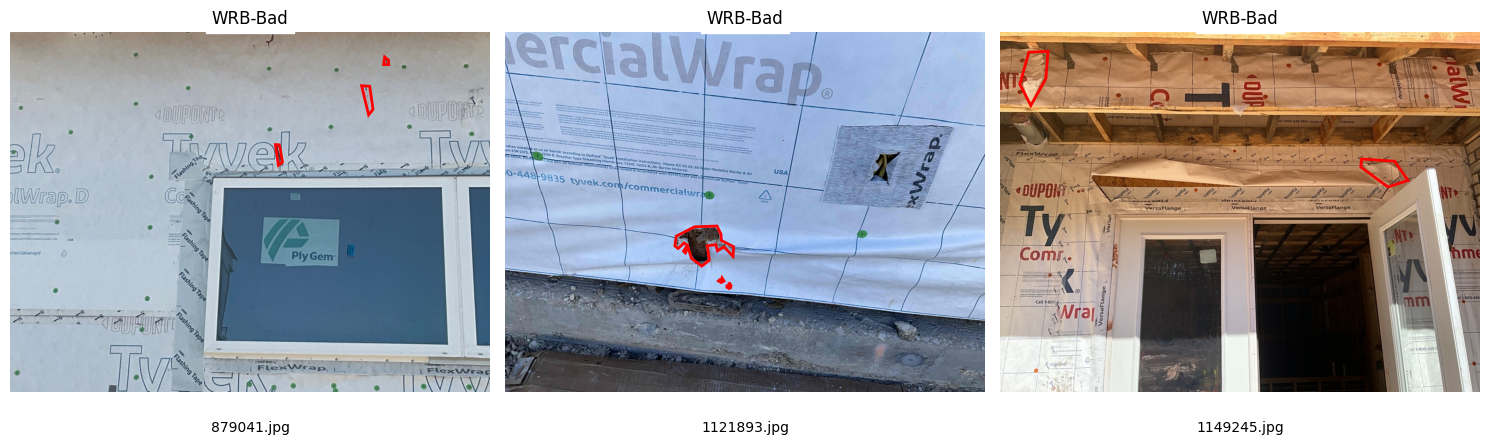

In [3]:
from utils.visualization_functions import visualize_random_images_with_polygon_annotations

# Load the JSON file containing the annotations
with open(json_dataset_path_polygon, 'r') as f:
    combined_annotations = json.load(f)

# Display the images
num_images_to_visualize = 3
visualize_random_images_with_polygon_annotations(combined_annotations, num_images_to_visualize)
